# House Prices using Backward Elimination

Just started with machine learning. I have used backward Elimination to check the usefulness of dependent variables.

In [ ]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv(r"C:\Users\shali\Desktop\DS_Road_Map\8. Machine Learning\Regression\MLR_House_Price_Predition\House_data.csv")
#to see what my dataset is comprised of
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#checking if any value is missing
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [3]:
#checking for categorical data
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
#dropping the id and date column
dataset = dataset.drop(['id','date'], axis = 1)

C:\Users\shali\AppData\Roaming\Python\Python313\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


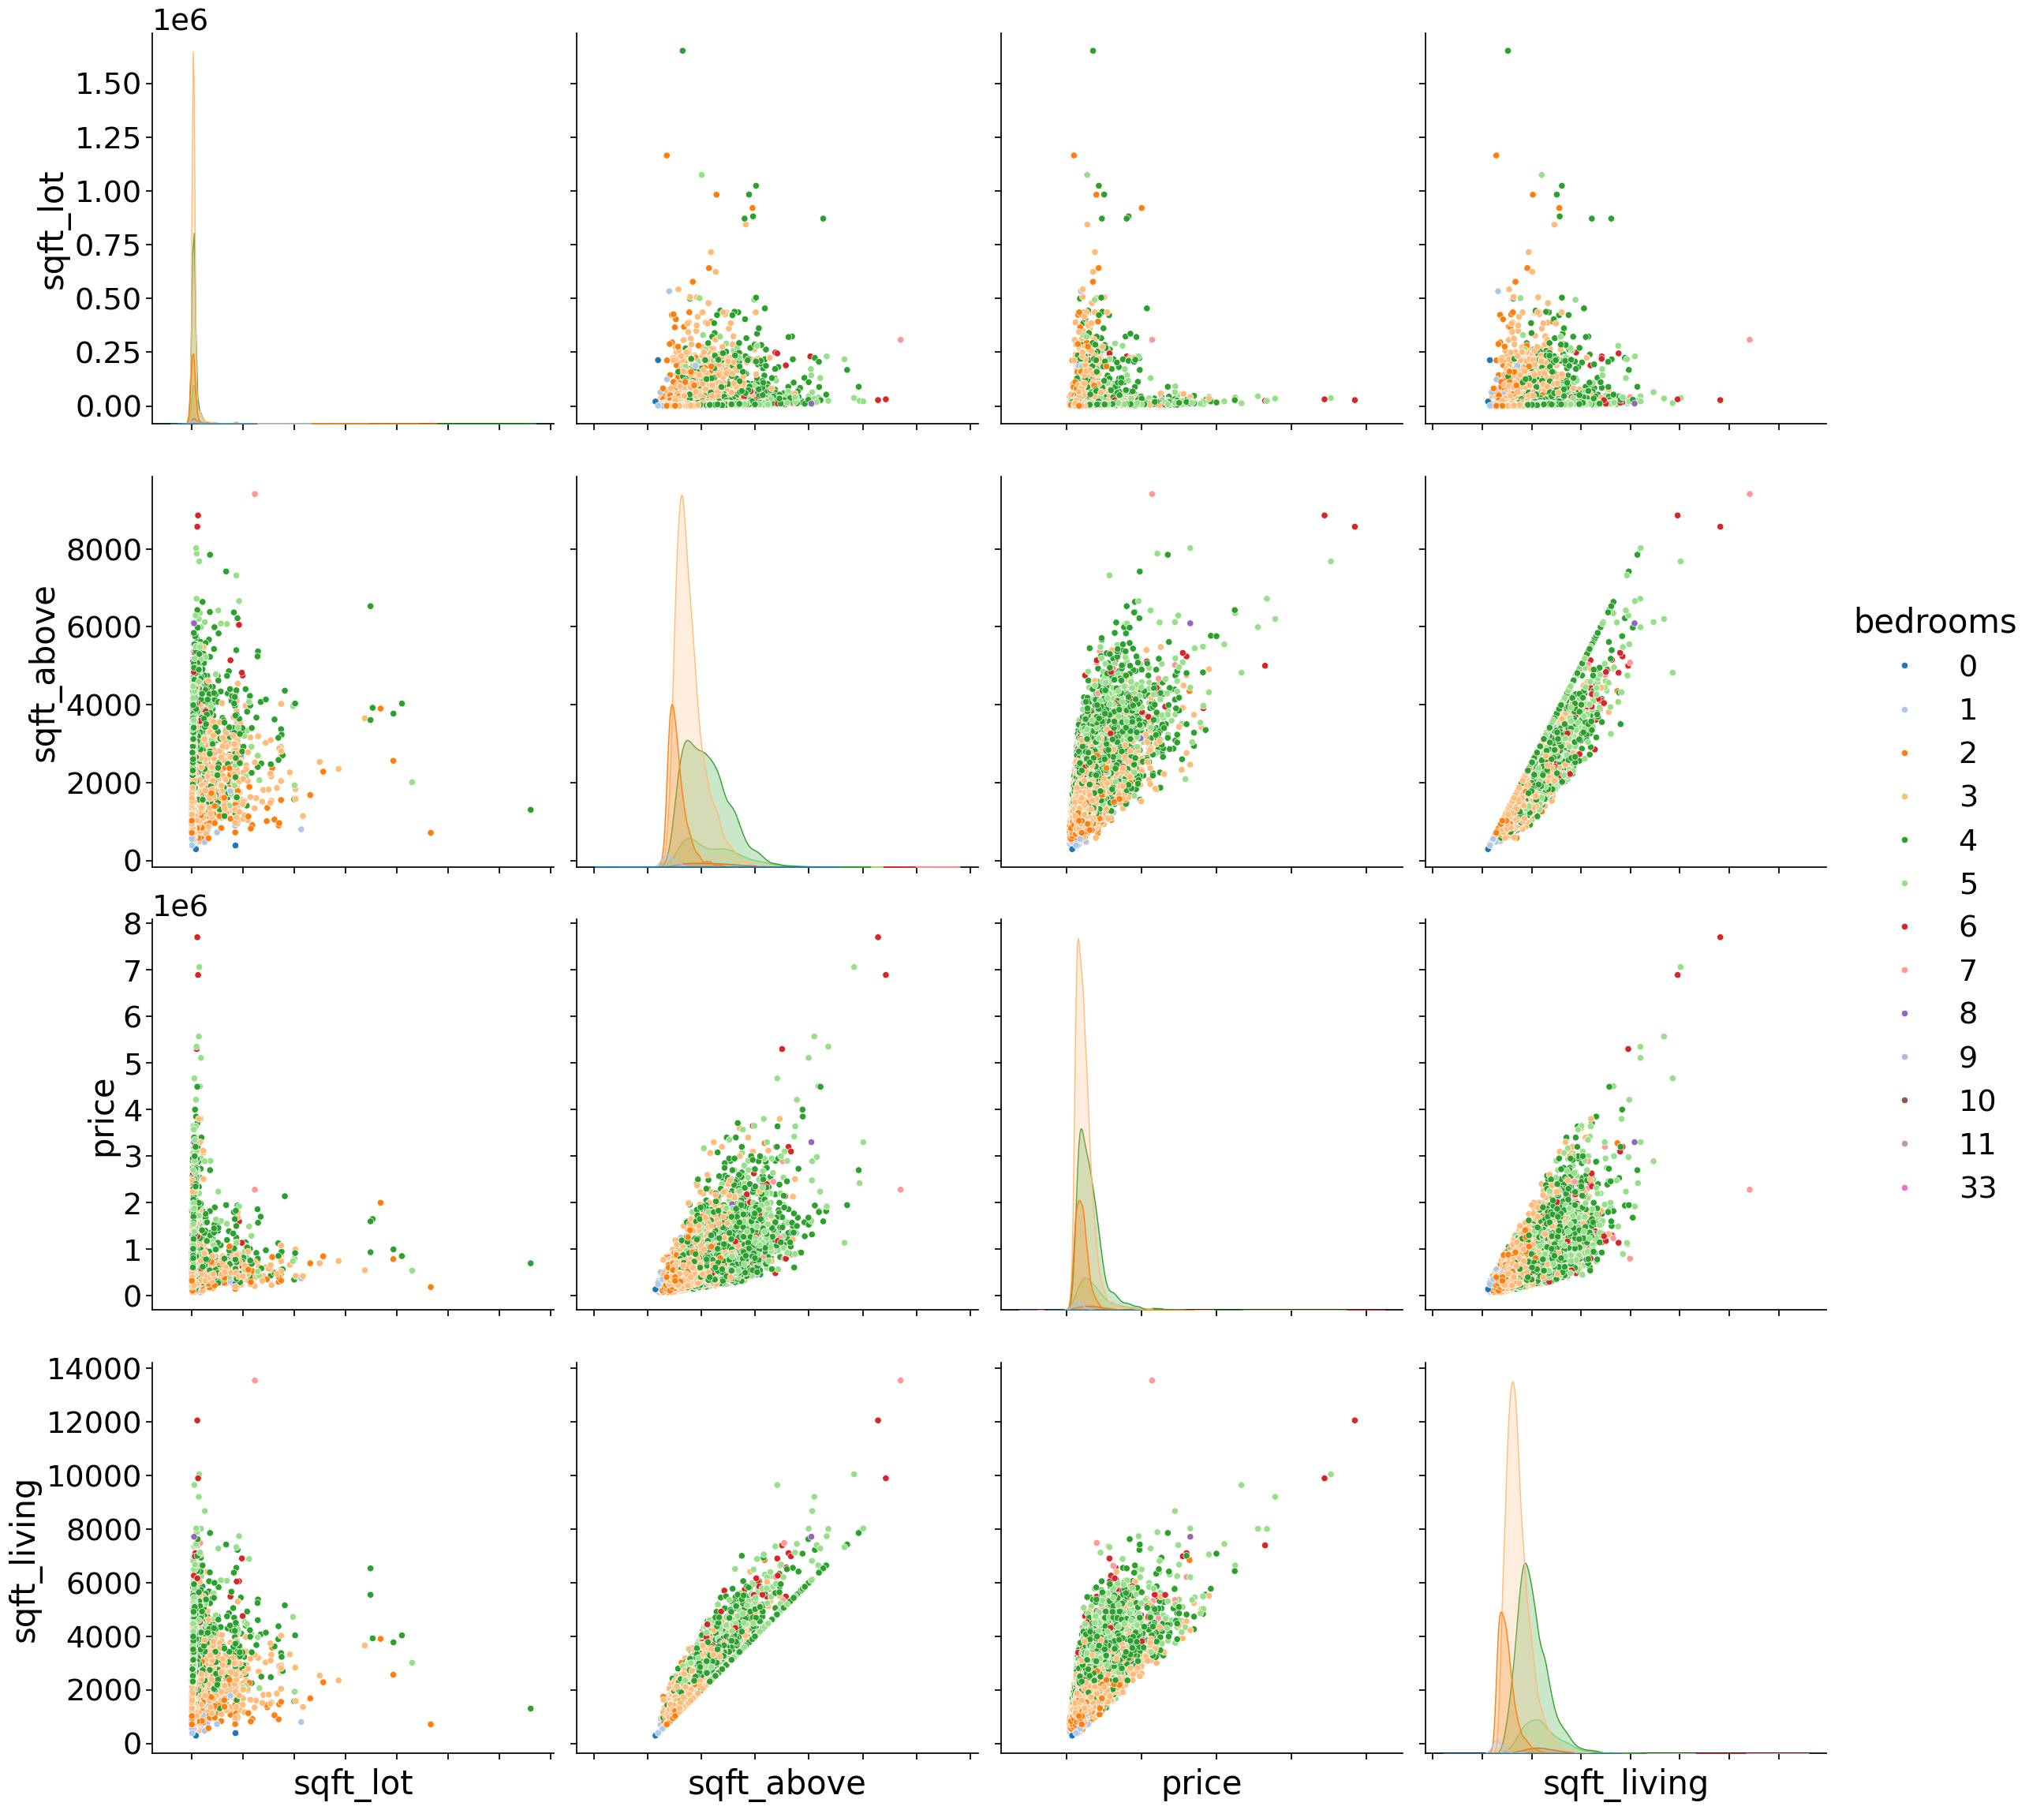

In [6]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
                 hue='bedrooms', palette='tab20',size=6)
g.set(xticklabels=[]);

In [8]:
#separating independent and dependent variable
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [11]:
import numpy as np
import statsmodels.api as sm

def backwardElimination(X, y, SL=0.05):
    X = sm.add_constant(X)  # add intercept
    numVars = X.shape[1]
    for i in range(numVars):
        regressor = sm.OLS(y, X).fit()
        max_pval = max(regressor.pvalues)
        if max_pval > SL:
            max_index = np.argmax(regressor.pvalues)
            X = np.delete(X, max_index, 1)  # remove feature with highest p-value
        else:
            break
    print(regressor.summary())
    return X

# Example usage
SL = 0.05
X_opt = X[:, :18]   # your chosen features
X_modeled = backwardElimination(X_opt, y, SL)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3145.
Date:                Wed, 20 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:27:07   Log-Likelihood:            -2.9462e+05
No. Observations:               21613   AIC:                         5.893e+05
Df Residuals:                   21596   BIC:                         5.894e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.727e+06   2.89e+06      1.983      0.0